## Трек «CV-инженер» 
### Skillfactory: DSPR-19
### Модуль 4. Hard & Software. Часть I 

### 1. Что вас ждёт в этом модуле?

→ В предыдущих модулях вы работали с достаточно лёгкими моделями, которые без проблем можно запустить на собственном ноутбуке. Однако в реальных задачах порой приходится обучать достаточно тяжеловесные сети — они могут обучаться в Google Colab недели и месяцы, при этом вовсе не запуститься. С такими моделями можно столкнуться при решении задач классификации и сегментации изображений, при обучении языковых моделей, моделей распознавания и генерации речи. Нередко такие задачи требуют работы с большими выборками.

Как раз для таких задач используют виртуальные серверы.

### В ЭТОМ МОДУЛЕ МЫ РАЗБЕРЁМ:

- что такое сервер и виртуальный сервер;
- почему в задачах машинного обучения GPU работает быстрее, чем CPU.

### ВЫ НАУЧИТЕСЬ:

- выбирать оптимальные вычислительные ресурсы под вашу задачу;
- создавать собственные виртуальные серверы;
- настраивать окружение сервера;
- запускать обучение на GPU.

В конце данного модуля вы решите задачу классификации цветов с помощью GPU.

МАТЕРИАЛЫ МОДУЛЯ ПОДГОТОВИЛИ:
	
АЛЕКСАНДР МАМАЕВ

Разработчик-исследователь «ВКонтакте».



### 2. Сервер и виртуальный сервер

⛏ Прежде чем мы перейдём к практической работе с серверами, давайте разберёмся, что это такое сервер и какими они бывают.

### ЧТО ТАКОЕ СЕРВЕР?

Сервер напоминает обычный компьютер, который имеет необходимые мощности для запуска моделей, за некоторыми исключениями.

→ Сервер выглядит, как вытянутый металлический ящик. Такая форма служит для более компактного размещения серверов группами в серверных стойках, предназначенных для защиты серверов от внешних повреждений.

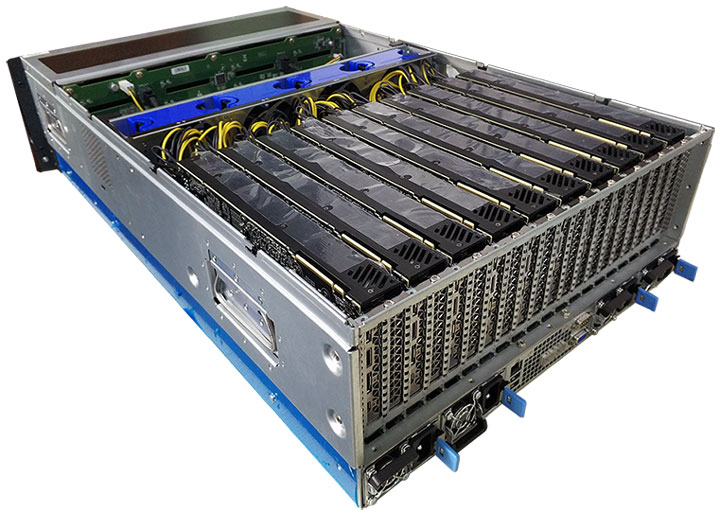

По сути **сервер** — это целая группа компьютеров, подключённых к сети, на которых можно производить вычисления.

Обычно пользователи не ставят серверные стойки у себя дома, эту задачу доверяют **дата-центрам** — специальным зданиям для размещения серверов со всем необходимым для работы вычислительных машин: доступом в сеть, электричеством, охлаждением и даже вооружённой охраной.

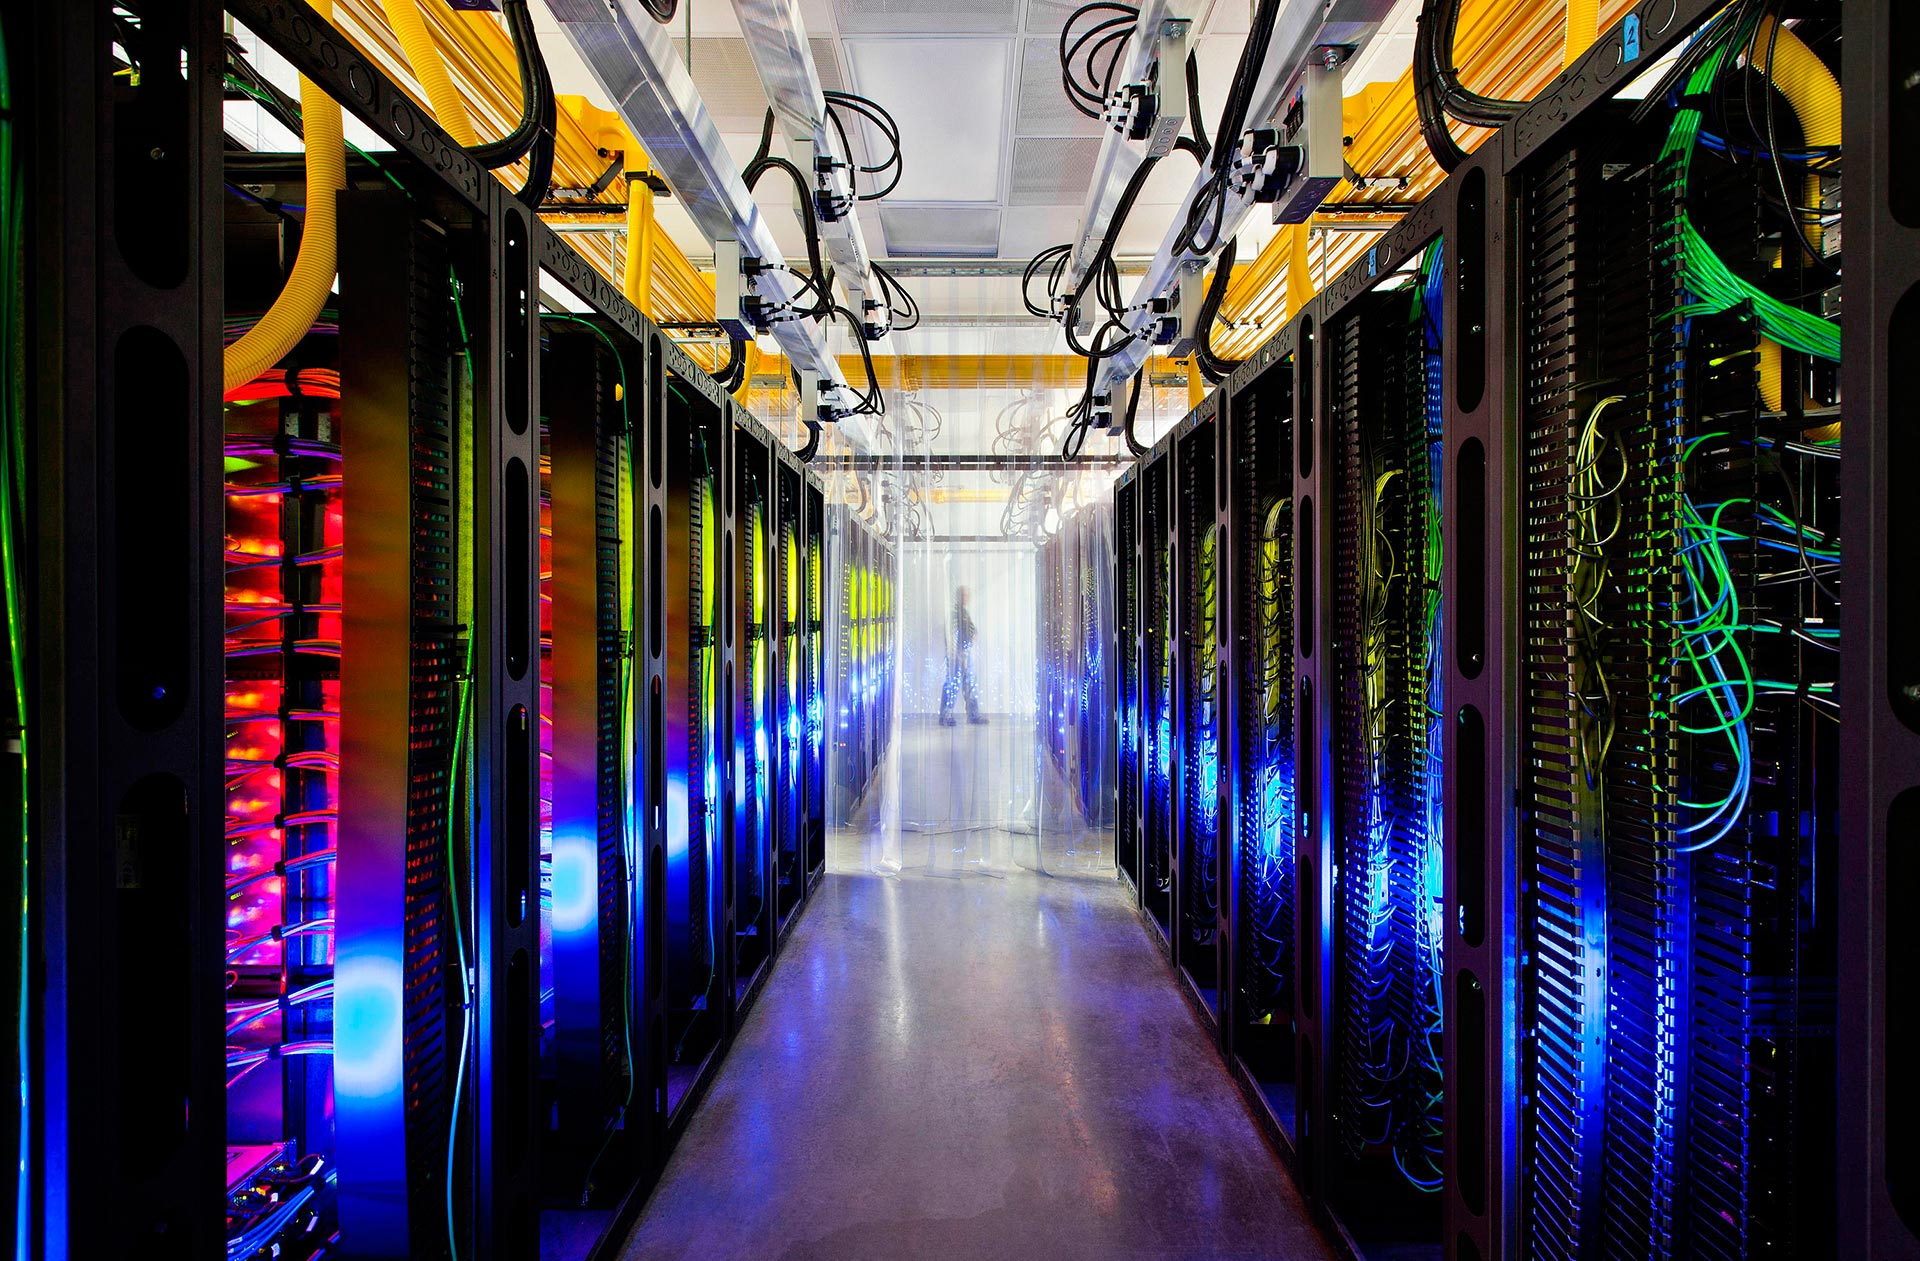

Теоретически мы сами можем зайти в какой-нибудь интернет-магазин компьютерной техники, купить необходимые комплектующие для сервера, собрать его и отдать в ближайший дата-центр, чтобы уже на нём производить свои расчёты.

ImgНо что, если сервер нам необходим на короткое время, мы хотим обучить одну модель и не тратить много денег на покупку дорогостоящего железа?

Для таких задач существуют **виртуальные серверы.**

### ЧТО ТАКОЕ ВИРТУАЛЬНЫЙ СЕРВЕР?

**Виртуальный сервер** —  это компьютер, который вы можете взять в аренду у компании, или хостинг-провайдера. При этом этот компьютер может быть как маленькой частью большого сервера, так и целым сервером. Это зависит от той конфигурации, которую вы выбираете.

Провайдер, взимая с вас некоторую сумму за услуги аренды, сам обеспечивает закупку современного железа, поддержку работоспособности серверов, а также удобный способ доступа к ним.

### КТО ПРЕДОСТАВЛЯЕТ ВОЗМОЖНОСТЬ СОЗДАНИЯ ВИРТУАЛЬНЫХ СЕРВЕРОВ?

На данный момент существует огромное множество хостинг-провайдеров, каждый из которых предоставляет свои условия: у одних ниже цены, у других мощнее оборудование, а третьи размещают серверы ближе к вашему региону, делая доступ до них быстрее.

Выбор конкретного провайдера зависит от факторов, которые важны именно для вас.

Самым большим провайдером на данный момент является **AWS (Amazon Web Services)** — сервис американской компании Amazon, на котором базируется множество известных интернет-ресурсов. 

Существуют и другие глобальные и локальные игроки на этом рынке:

Кликайте на логотипы хостинг-провайдеров, чтобы узнать подробности ↓

https://view.genial.ly/60f7c9a2e058fa0dbb926a35/interactive-content-dspr-nlp-module-6

⛏ В этом модуле мы научимся создавать серверы в Яндекс.Облаке. Однако навык настройки сервера никак не зависит от конкретного провайдера. В дальнейшем вы сможете применить свои знания при работе с другими сервисами, которые будут вам необходимы.

### Задание 1.1

Чем отличается сервер от стационарного компьютера?
- Формой и типом установки 

### 3. Вычисления на GPU и CPU

⛏ Теперь, когда вы узнали, что такое сервер, давайте разберёмся с его начинкой, а именно с теми блоками, которые позволяют нам делать расчёты, — **GPU и CPU.**

### ЧТО ТАКОЕ GPU И ЧЕМ ОН ОТЛИЧАЕТСЯ ОТ CPU?

Вы, вероятно, уже знаете, что такое **центральный процессор (он же CPU)** и что именно он отвечает за многие вычисления в компьютере. Когда вы пишете очередной цикл или оператор сравнения, именно он решает, что ваш код будет делать дальше.

Однако, помимо центрального процессора, в компьютере существует и другой вычислительный блок — **графический процессор (GPU)**. По названию легко догадаться, что изначально он предназначался для обработки графики, ведь именно от GPU зависит, пойдёт ли на вашем компьютере последняя "Call Of Duty". 

Но достаточно быстро инженеры поняли, что GPU можно использовать и для другой задачи — для научных расчётов, к которым, например, относятся физические вычисления или же обучение нейронных сетей.

И с этой задачей GPU справляется намного быстрее, чем CPU. Ускорение зачастую составляет сотни и тысячи процентов. Так, используя GPU, вы можете натренировать классификатор ImageNet всего за пару часов вместо нескольких месяцев.

ImgС чем связан такой рост производительности и почему мы не пишем все программы на GPU?

Любой вычислительный процессор (GPU или CPU) состоит из вычислительных блоков поменьше, называемых **ядрами**. Каждое ядро состоит из множества транзисторов, которые позволяют исполнять инструкции, закодированные внутри них.

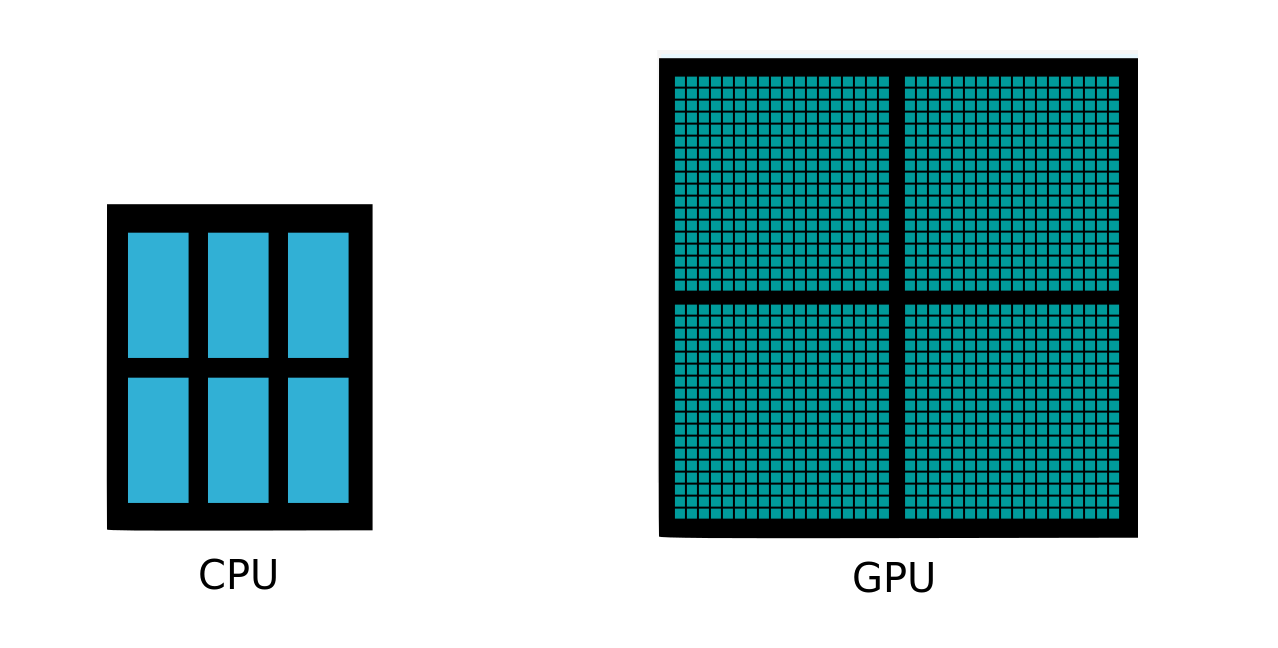

→ Ядра CPU устроены таким образом, что ядра содержат в себе множество сложных специфических инструкций, которые можно применить над входными данными. Это делает ядра достаточно гибкими и мощными в плане возможности выполнения различных инструкций, но при этом они становятся более громоздкими и сложными в производстве. Обычные CPU имеют на борту порядка 2-8 ядер, каждое ядро за один такт выполняет одну операцию. Таким образом, процессор с 4 ядрами за один такт выполняет 4 операции.

Скорость процессора определяется **тактовой частотой** — количеством тактов за секунду. За один такт одноядерный процессор может выполнить одну элементарную операцию.

→ В свою очередь GPU состоит из множества более мелких и простых ядер, что позволяет запускать более элементарные операции параллельно. Это полезно, когда нам необходимо посчитать результат одной операции для большого массива данных, а в нейронных сетях требуется именно это, ведь при обучении таких моделей мы должны просчитать большое количество независимых операций умножения или сложения для большой матрицы.

**Подытожим:**

- CPU нужен тогда, когда мы хотим совершать сложные операции со сравнительно небольшим количеством данных;
- а GPU — когда мы хотим делать десятки тысяч абсолютно одинаковых операций над разными данными.

### ВИДЕОКАРТЫ И ЧЕМ ОНИ РАЗЛИЧАЮТСЯ

Графический процессор, или GPU, является основной частью **видеокарты** — части компьютера для передачи графической информации на экран.

Как мы уже выяснили, GPU, помимо графики, может также использоваться и для сложных вычислений, а потому видеокарты приобретаются и для таких задач. Также при настройке виртуального сервера вам нередко будет необходимо выбрать видеокарту, установленную на удалённом сервере.

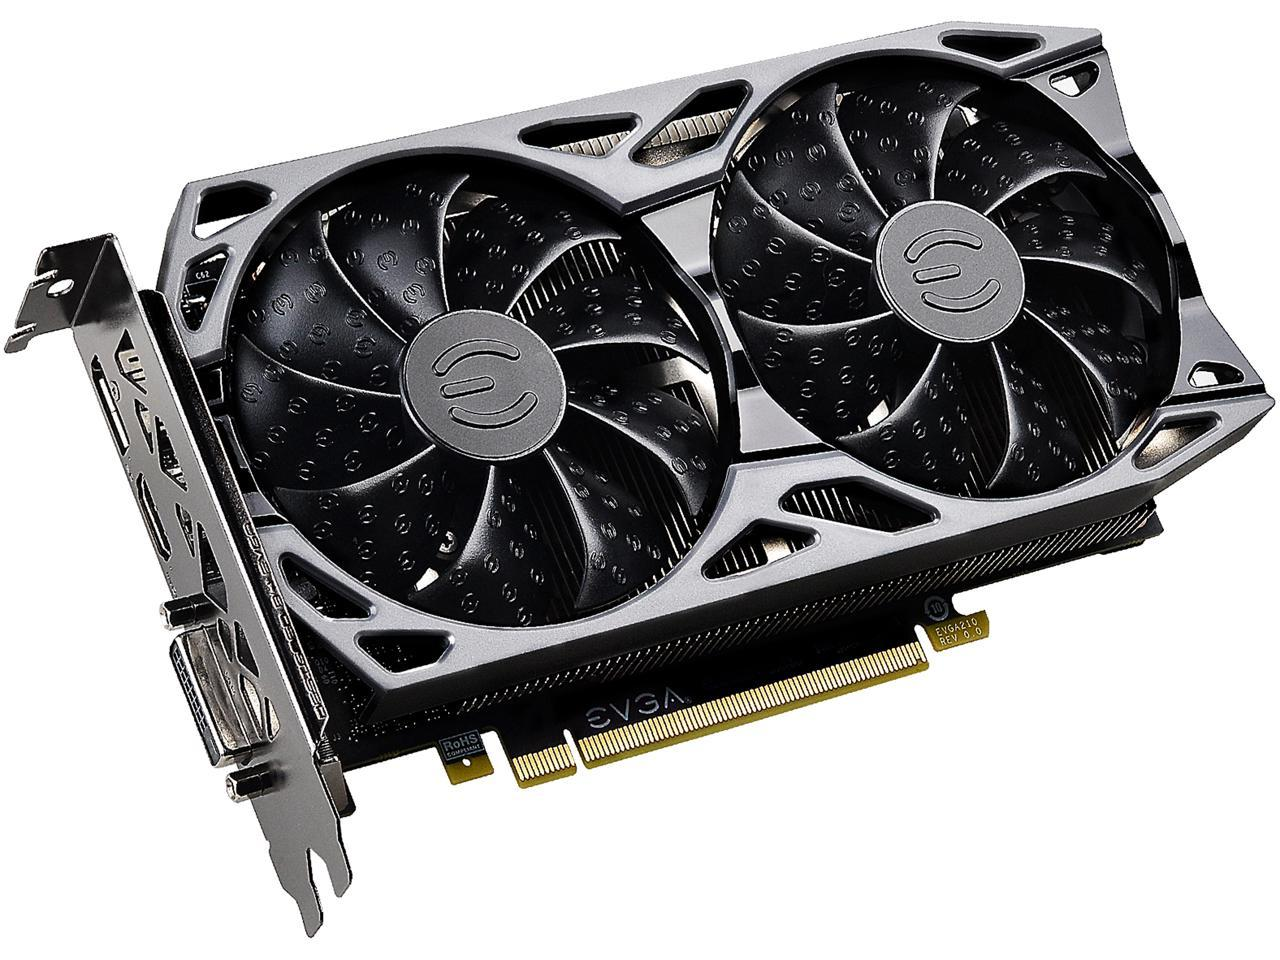

→ Исторически сложилось так, что основным игроком на рынке видеокарт для математических расчётов стала **NVIDIA**, в связи с этим большинство софта написано и оптимизировано под систему вычислений **CUDA.**

**CUDA** — это технология NVIDIA, позволяющая использовать GPU их производства для задач, отличных от отрисовки графики, включая физические вычисления, расчёты математических моделей и обучение нейронных сетей.


Это делает обучение моделей на картах, отличных от NVIDIA, невозможным или очень сложным. Поэтому в дальнейшем под видеокартами мы будем иметь в виду именно видеокарты NVIDIA.

### КАКИЕ ВИДЕОКАРТЫ СУЩЕСТВУЮТ И КАКИЕ ИЗ НИХ ЛУЧШЕ ВСЕГО ПОДХОДЯТ ДЛЯ РАБОТЫ С НЕЙРОСЕТЯМИ?

Видеокарты существуют в двух исполнениях:

- игровые (для запуска компьютерных игр);
- серверные (для установки в дата-центры).  

С точки зрения взаимодействия с ними глобальной разницы нет — вы можете обучать нейронные сети как на игровых, так и на серверных видеокартах.

Однако они могут различаться в максимальной мощности, а также в своём устройстве.

Так, например, серверные карты зачастую не имеют собственного охлаждения (кулера) и подсоединяются к общей системе охлаждения сервера. Также серверные GPU могут иметь специфические оптимизации: карты NVIDIA A100 содержат особый тип данных TF32, который позволяет значительно ускорить обучение нейросетевых моделей.

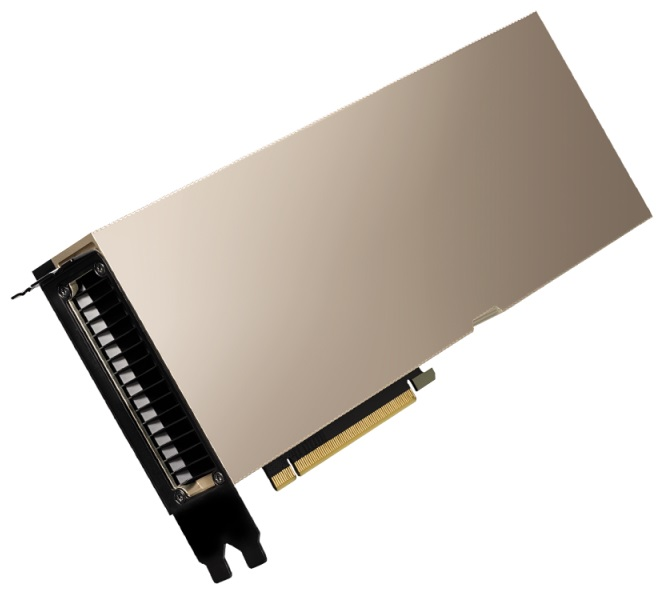

При выборе видеокарты стоит ориентироваться на два показателя — **видеопамять и производительность.**

**Видеопамять** измеряется в гигабайтах и отражает то, сколько собственной памяти для хранения данных имеет видеокарта.

→ Видеокарта может совершать вычисления только над теми данными, которые находятся в её видеопамяти, а не в оперативной памяти. 

От объёма видеопамяти зависит, поместится ли ваша модель на видеокарту и какой максимальный размер пакета данных (batch) вы сможете выбрать.

**Производительность** измеряется во «флопсах» (FLOPS) и отражает, сколько операций с плавающей точкой в секунду способна выполнить эта видеокарта.

**Операции с плавающей точкой** — это операции умножения и сложения над иррациональными числами, с которыми мы сталкиваемся при обучении нейросетей.

Подходящую конфигурацию вы можете выбрать экспериментальным путём:

- Если видите, что вам не хватает памяти для хранения модели, берите GPU с большим количеством видеопамяти.
- Если обучение происходит медленно, тогда берите более производительную видеокарту с большим количеством FLOPS.  

→ О том, как следить за потреблением ресурсов видеокарты, мы расскажем в практическом блоке.

Хорошее, актуальное на данный момент сравнение GPU-карт можно найти здесь (https://timdettmers.com/2020/09/07/which-gpu-for-deep-learning/).

### Задание 3.1

За счёт чего вычисления над матрицами выполняются быстрее на GPU, чем на CPU?
- За счёт большого количества маленьких ядер с малым количеством инструкций верно

### Задание 3.2

В каких задачах CPU работает лучше, чем GPU?
- В задачах, где есть необходимость выполнять сложные инструкции 

### 4. Создание сервера и подключение к нему

⛏ Перейдём к практике. В этом блоке мы разберёмся, как создать сервер с GPU, как подключиться к нему, а также узнаем, как установить необходимый нам софт.

### УСТАНОВКА SSH-КЛИЕНТА

→ Для работы с удалёнными серверами используется протокол **SSH (Secure Shell Protocol)**. Этот протокол позволяет подключить терминал на компьютере к терминалу на сервере. Благодаря нему мы сможем работать с удалённой консолью сервера так, будто это наш локальный компьютер.

Перед созданием сервера нам необходимо установить SSH-клиент — программу, которая умеет работать с протоколом SSH. Через неё мы будем общаться с сервером.

→ Инструкция по установке SSH на Windows (https://www.putty.org/)

→ Инструкция по установке SSH на Linux (https://losst.ru/ustanovka-ssh-ubuntu-16-04)

MacOS имеет встроенный SSH-клиент — его дополнительная настройка не требуется.

### КАК СОЗДАТЬ СВОЙ ПЕРВЫЙ GPU-СЕРВЕР В ЯНДЕКС.ОБЛАКЕ?

⛏ Теперь мы можем создать свой первый GPU-сервер в Яндекс.Облаке (cloud.yandex.ru, https://console.cloud.yandex.ru/).

Перейдите на сайт Яндекс.Облака, войдите в свой существующий аккаунт или создайте новый. Далее перейдите во вкладку Консоль управления. В списке доступных сервисов выберите **Compute Cloud.**

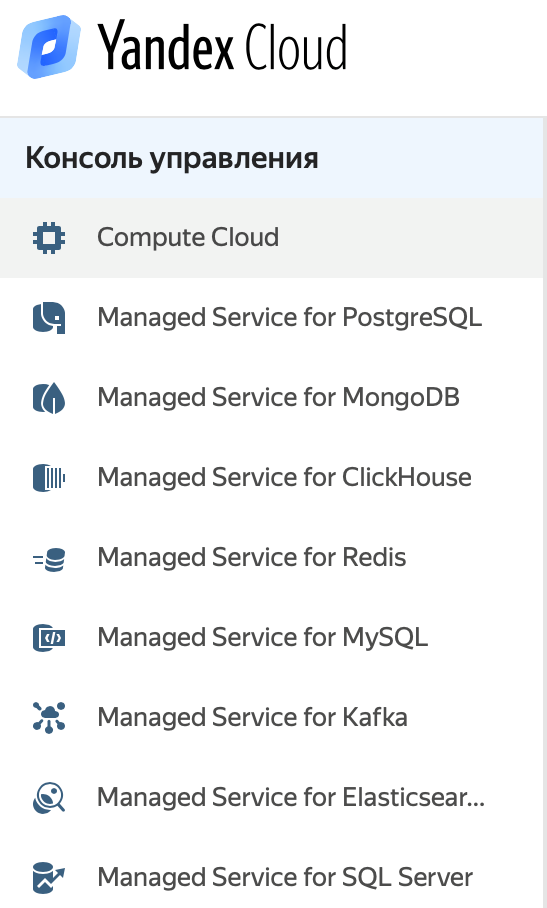

Нажмите на кнопку **Создать ВМ**. После этого вы окажетесь на странице настройки виртуального сервера.

Укажите любое имя для вашего сервера. Описание и зону доступности можно оставить по умолчанию.

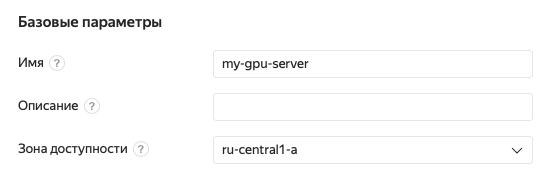

В качестве образа системы выберем последнюю версию Ubuntu с поддержкой GPU.

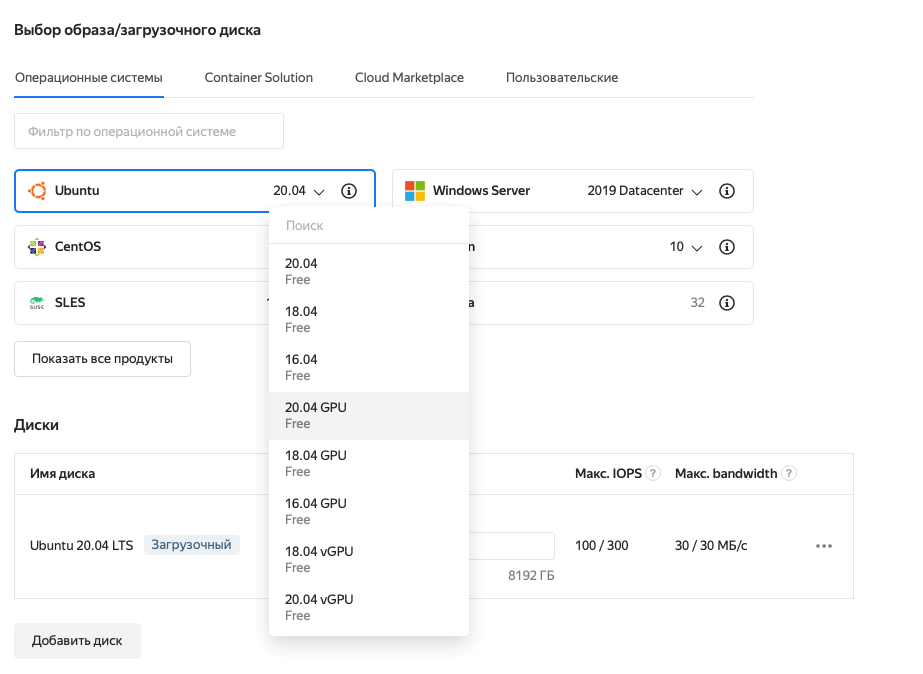

Размер диска выбирайте по своим предпочтениям: если для хранения данных вам необходимо больше дискового пространства, установите необходимое количество на этом этапе. Однако размер диска можно будет поменять и после создания сервера.

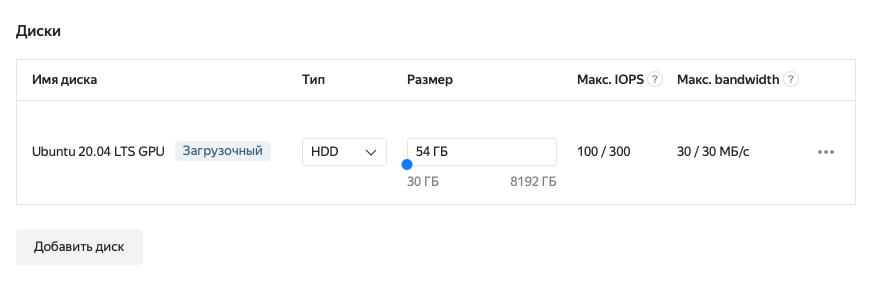

**! Теперь самое важное — настройка вычислительных ресурсов.**

В качестве платформы выбираем Intel Broadwell с видеокартой Tesla V100. На данный момент нам хватит одной карты, но  в дальнейшем вы можете выбрать больше.

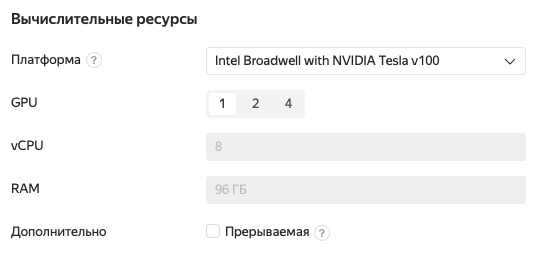

Сетевые настройки оставляем по умолчанию и переходим к пункту **Доступ**. Логин можно выбрать любой — это имя пользователя на сервере.

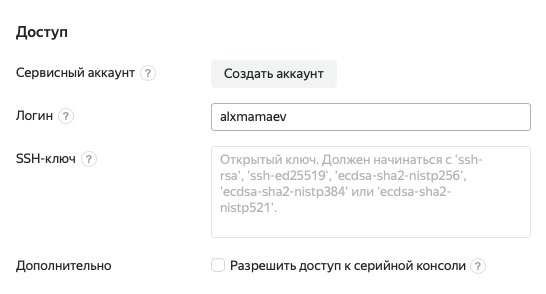

Далее нужно ввести наш **публичный SSH-ключ.**

Подключение SSH содержит методы шифрования.

⚡ Данные на компьютере шифруются с помощью **приватного** ключа, который вы **никогда не должны передавать третьим лицам.**

Чтобы сервер знал, что доступ запрашиваем именно мы, он просит предоставить **публичный ключ**, с помощью которого он будет расшифровывать наши сообщения и идентифицировать нас.

→ Как создать SSH-ключ на Windows (https://neoserver.ru/help/kak_sozdat_ssh_kluchi_na_windows)

→ Как создать SSH-ключ на Linux/MacOS (https://clck.ru/DkUvQ)

После создания ключа копируем **публичный ключ** в поле **SSH-ключ.**

→ На этом моменте вы уже могли заметить, что справа от настроек вашего сервера отображается текущая цена. Она может шокировать, но не стоит пугаться — цена указана за месяц, то есть из расчёта, что ваш сервер будет работать весь месяц без остановки. ⚡ Поэтому **не забывайте отключать сервер после окончания работы в нём.**

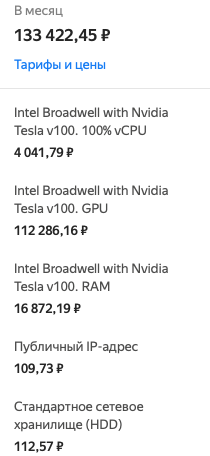

Теперь можно смело нажимать на кнопку **Создать ВМ.**

После всех выполненных действий может появиться сообщение, что на вашем аккаунте нет достаточной квоты для создания сервера с GPU.

В таком случае нужно нажать на кнопку **Запросить квоту** и подробно расписать, для каких целей вы будете использовать сервер, дождаться ответа (ответ приходит, в среднем, в течение суток), после чего попробовать создать сервер заново с теми же настройками.

### ПРО ОПЛАТУ

Не забывайте, что для работы сервера на счету должны быть деньги. Проверить текущий баланс и пополнить его можно в разделе **Биллинг.**

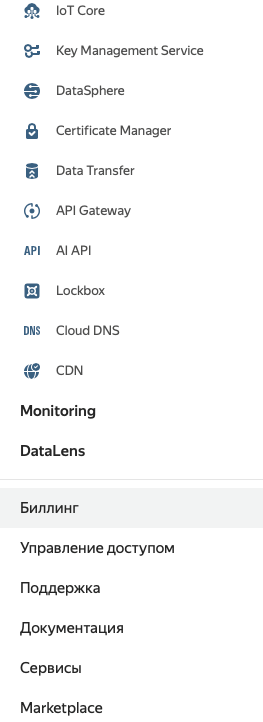

### КАК ПОДКЛЮЧИТЬСЯ К СЕРВЕРУ ПО SSH?

Теперь, если мы перейдём во вкладку **Compute Cloud**, мы увидим наш сервер.

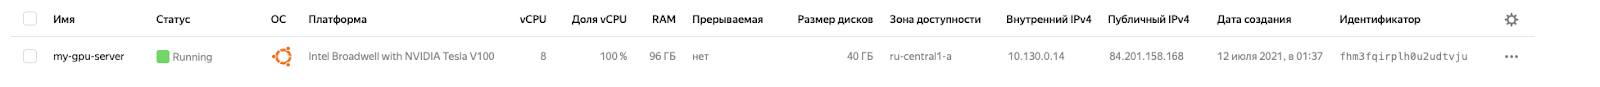

Чтобы подключиться к серверу с MacOS и Linux, перейдите в ваш терминал и наберите > ssh ваш_логин@ip_адрес_сервера.

Логин должен быть таким же, какой вы указывали при настройке конфигурации сервера, IP-адрес можно узнать в колонке **Публичный IP-адрес.**

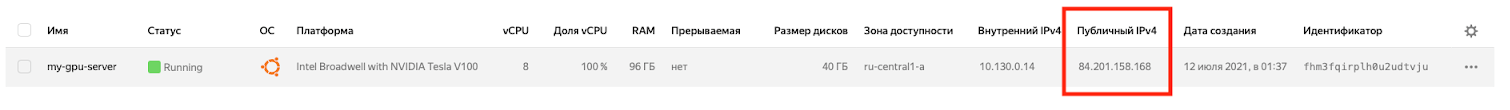

Чтобы подключиться к серверу с Windows, запустите cmd.exe или powershell.exe.

Создайте новый ключ с помощью команды: ssh-keygen -t rsa -b 2048

Логин и IP-адрес вы также можете посмотреть в своём аккаунте Yandex.Cloud.

После ввода команды мы увидим сообщение Are you sure you want to continue connecting (yes/no/[fingerprint])?. Пишем yes и нажимаем Enter. 

Далее в консоли мы увидим следующее:

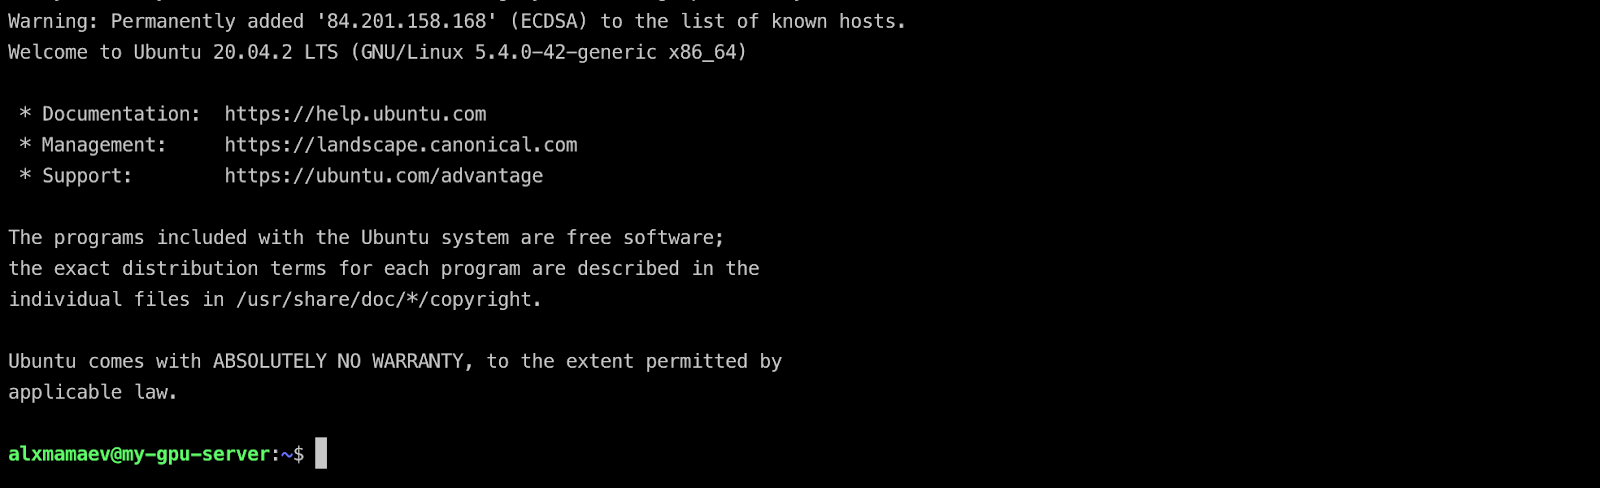

Это означает, мы подключились к серверу. Ура! ⭐

### Задание 4.1

Какие данные потребуются вам для соединения с сервером?
- Публичный SSH-ключ
- Имя сервера
- Данные сервисного аккаунта

### Задание 4.2

Для чего используется SSH?
- Для подключения терминала к удалённому серверу

⭐ Все новые клиенты Yandex.Cloud могут воспользоваться пробным периодом работы с их виртуальным сервером. Этого будет достаточно, чтобы познакомиться с сервисом, привыкнуть к нему и запустить обучение нескольких моделей.

### Задание 4.3

Создайте на Yandex.Cloud виртуальную машину со следующими характеристиками:
Intel Broadwell with NVIDIA Tesla V100
1 GPU
Размер диска — 60 Гб.
В качестве операционной системы выберите ту, которой пользуетесь прямо сейчас.

В поле для ответа введите публичный IP-адрес вашего сервера.

Пример ввода ответа: 123.456.789.159




### 5. Настройка окружения сервера


⛏ Для настройки рабочего окружения будем использовать **Miniconda**. Для её установки перейдите на сайт (https://docs.conda.io/en/latest/miniconda.html). 

Найдём версию для Linux, Python 3.8, linux 64. Копируем указанную ссылку.

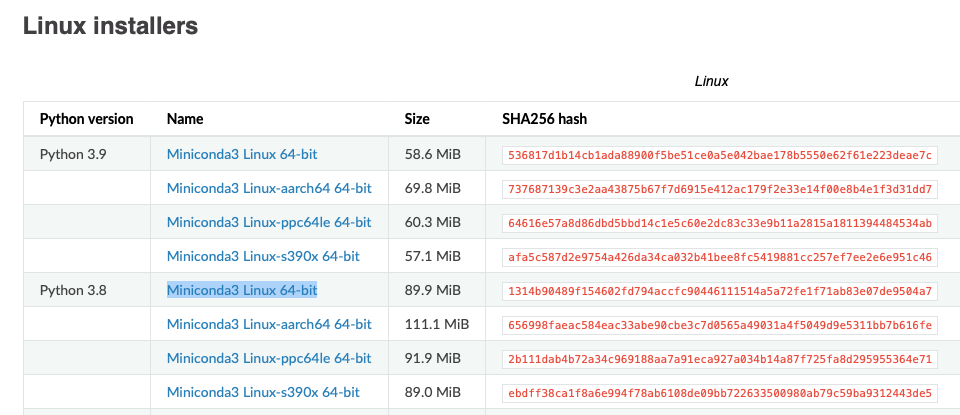

После этого возвращаемся в терминал, пишем > wget ссылка_на_miniconda и нажимаем Enter.

В нашем случае результат выглядит так:

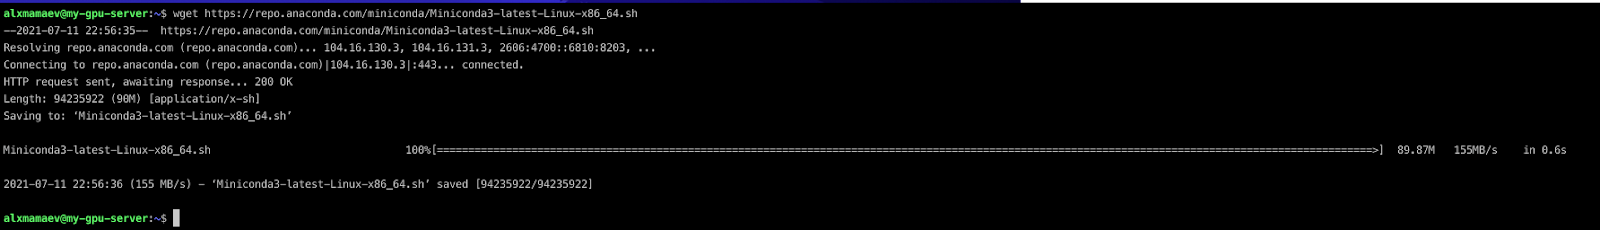

Посмотреть список файлов в текущей директории можно с помощью команды ls.

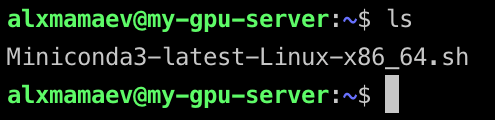

Запустим установщик командой > sh название_файла_установщика.

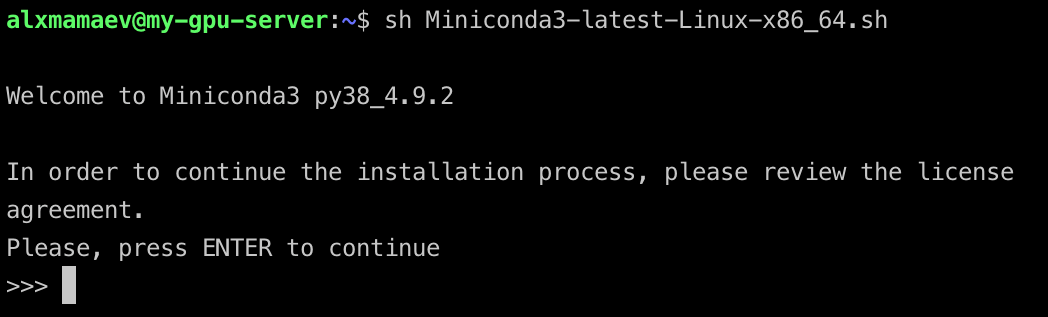

Нажимаем на Enter и проходим процесс установки, все параметры оставляем по умолчанию.

Conda прописала пути до своих бинарных файлов в окружении linux, чтобы интерпретатор bash заметил их.

Перезапускаем текущую сессию bash-командой > exec bash.

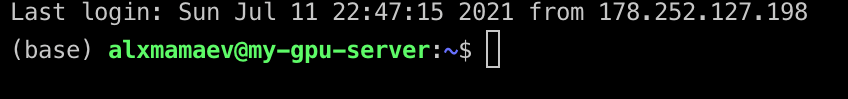

Теперь мы видим, что перед логином отображается название текущего conda environment, по умолчанию — base.

### ЗАПУСК JUPYTER NOTEBOOK НА СЕРВЕРЕ

⛏ Скорее всего, вы уже задаётесь вопросом, как запустить Jupyter на сервере. Сделать это достаточно просто.

Для начала, если у вас нет этого сервиса, установим сам Jupyter командой > conda install jupyter -y.

После этого Conda установит Jupyter и все необходимые зависимости.

Чтобы запустить Jupyter, вводим следующую команду: > jupyter notebook --ip 0.0.0.0  --port 8000 --allow-root.

Далее в адресной строке браузера вводим ip_адрес_сервера:8000. Мы увидим следующее окно — Jupyter запрашивает у нас password token.

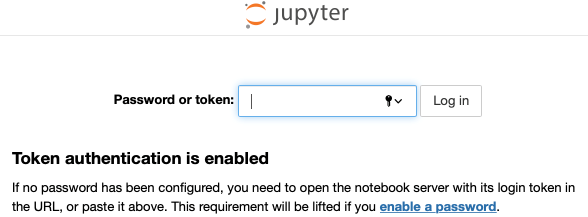

Увидеть и скопировать его можно в консоли:

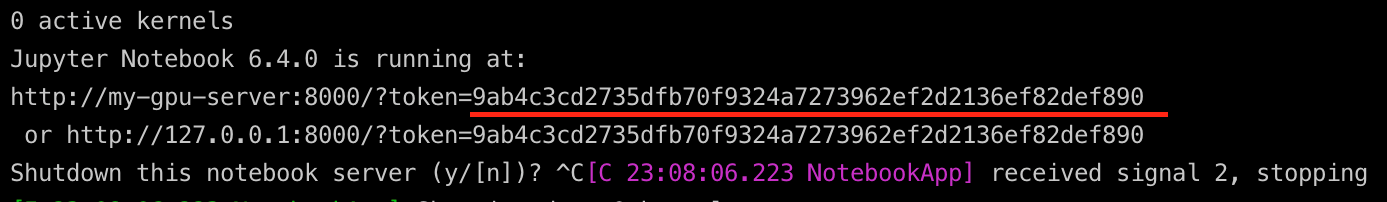

После ввода правильного токена Jupyter откроет текущую директорию, в которой он был запущен.

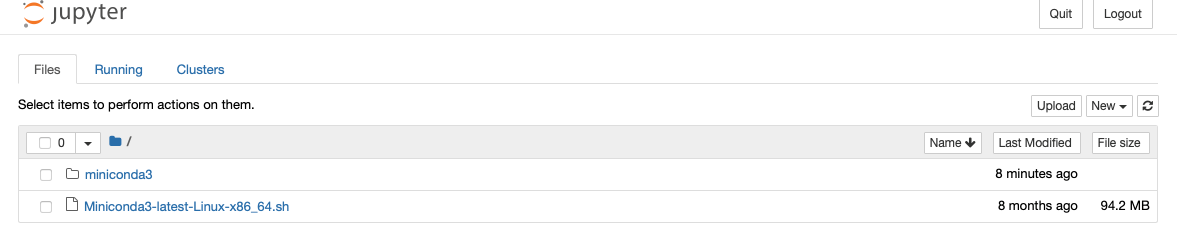

Стоит учитывать, что, как только мы закроем терминал с запущенным SSH, Jupyter сразу же отключится и на сервере. Чтобы этого не произошло, в конце команды запуска Jupyter необходимо добавить символ & — это укажет интерпретатору bash запускать процесс в фоне.

Давайте выключим текущую сессию Jupyter, перейдя в консоль и нажав **Ctrl+C.**

После этого запустим Jupyter вновь, но на этот раз уже в фоне: > jupyter notebook --ip 0.0.0.0  --port 8000 --allow-root &.

### УЧИМСЯ ПОЛЬЗОВАТЬСЯ  NVIDIA-SMI

Чтобы контролировать текущую загрузку GPU, в Linux существует команда nvidia-smi, которая показывает загрузку каждой видеокарты на компьютере.

Чтобы попробовать её в действии, создайте новый терминал в Jupyter:

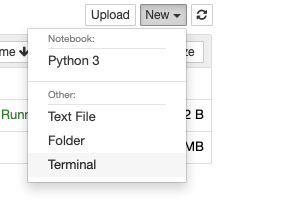

Этот терминал ничем не отличается от терминала SSH, только теперь мы можем открывать его в браузере.

После этого в появившемся окне наберите > nvidia-smi.

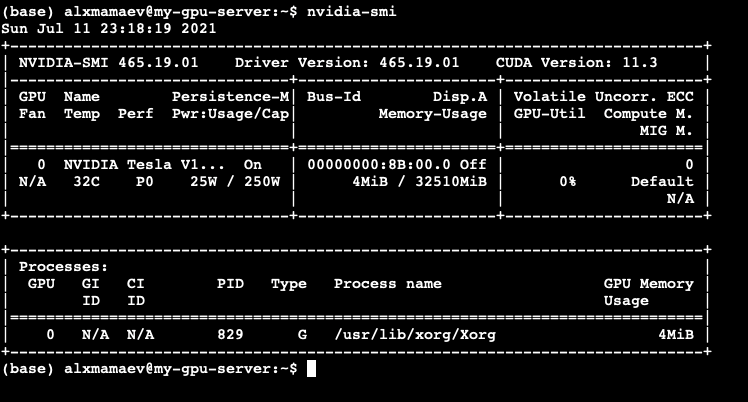

В первой таблице показана текущая загрузка GPU. **Memory-Usage** показывает, сколько мегабайт памяти используется в данный момент. Колонка **GPU Util** отражает (в процентах), насколько загружена видеокарта.

Чтобы следить за изменением нагрузки на GPU в реальном времени, можно воспользоваться командой watch, которая будет обновлять выводимую таблицу через указанный промежуток времени: > watch -n 0.5 nvidia-smi.

Теперь  новые данные nvidia-smi будут отображаться в терминале каждые 0.5 секунд.

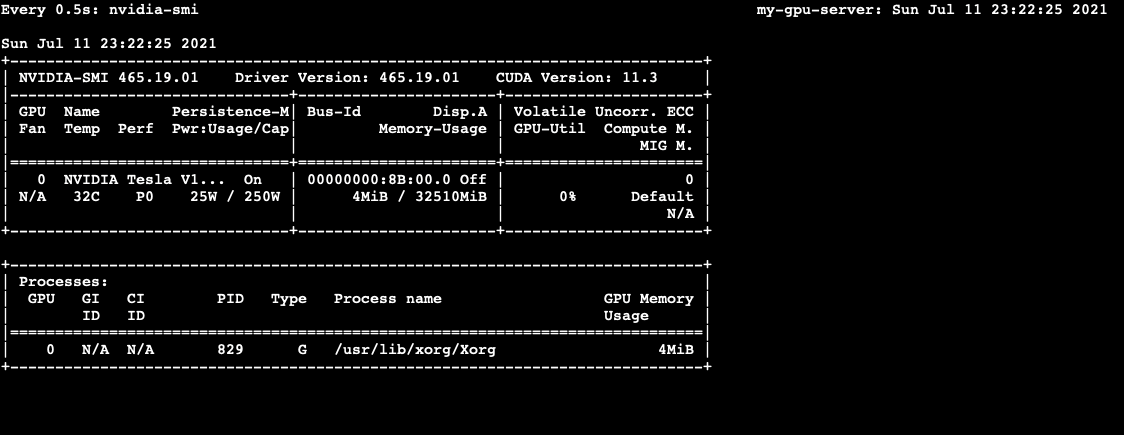

### Задание 5.1

Для чего используется утилита nvidia-smi?
- Для контролирования потребления ресурсов

### Задание 5.2

Как запустить выполнение программы в фоне, чтобы она не отключилась после завершения сессии ssh?
- nohup my_program &

### 6. Закрепление знаний

В этом модуле мы вспомнили, что такое сервер, познакомились с виртуальным сервером Yandex.Cloud и узнали о том, почему для нейросетей лучше подходят вычисления на GPU.

Зафиксируем главные теоретические выводы модуля:

- В реальных задачах глубокого обучения нередко приходится обучать достаточно тяжеловесные сети или работать с большими выборками данных. Поэтому дата сайентисту важно уметь подбирать подходящие ресурсы для обучения конкретных моделей.
- Виртуальный сервер — это сервер, который вы можете взять в аренду у компании или хостинг-провайдера в случае, если вычислительных мощностей вашего компьютера недостаточно для решения задачи.
- Среди известных международных провайдеров, предоставляющих виртуальные машины, — AWS, Google Cloud и Microsoft Azure. На российском рынке действуют такие сервисы, как МТС Cloud, SberCloud и Yandex.Cloud. Выбрать своего провайдера можно по ценам, доступному железу и просто по опыту взаимодействия с компанией.
- В отличие от центрального процессора (CPU) графический процессор (GPU) состоит из множества мелких и простых ядер. Это позволяет запускать более простые операции параллельно, что отлично подходит для обучения нейросетей и работы с большими выборками.
- GPU является основной частью видеокарты. При выборе видеокарты для работы стоит ориентироваться на два показателя — видеопамять и производительность.  

Для закрепления теоретического материала ответьте на несколько вопросов ниже ↓

### Задание 6.1

Укажите преимущества аренды виртуального сервера по сравнению с содержанием физического:
- Поддержку сервера обеспечивает провайдер
- Не нужно заботиться о том, куда разместить сервер

### Задание 6.2

Впишите название технологии для параллельных вычислений, которая чаще всего используется при обучении нейросетей и под которую оптимизирована большая часть сервисов глубокого обучения.
- CUDA

### Задание 6.3

На каком устройстве лучше запускать каждый из типов программ?
- CPU: База данных,текстовый редактор, парсер страниц
- GPU: Расчет физических явлений, математические расчеты

### Задание 6.4

Вы арендовали GPU, но обнаружили, что ваша модель не помещается на видеокарту. В следующий раз вы выберете:
- Видеокарту с большим количеством видеопамяти 

